## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Bartlomiej Mlynarkiewicz

Student ID: 17241782

### Task

<hr style="border:2px solid gray"> </hr>

This notebook contains a reference implementation of linear regression, a simple but very effective machine learning algorithm that we will discuss in more detail during the next semester. 

Inspect the reference implementation and create functions for all the matrix manipulations required to implement the linear regression algorithm. 

1. Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares estimate of the linear regression weight vector. Call this function `fit`.
2. Create a second function that uses the weights found by the fit method and a number of data points X to create new predictions. Call this function `predict`.
3. Finally, create a function that returns the weights found by the fit method. Call this function `get_params`.

### Goal

<hr style="border:2px solid gray"> </hr>

The goal of this task is to create your own implementation of linear regression using your own functions to implement the required matrix manipulations.

**Please note:**

- The function to calculate the inverse of a matrix need only be applicable to 2x2 matrices. All other functions should be able to handle matrices of arbitrary sizes.
- Error handling is very useful to prevent matrices of incorrect sizes resulting in run-time errors. 
- Add appropriate comments (doc strings) to the functions you have created.
- At this stage you should not create a class to encapsulate your code. Please add this element, if time permits, as part of your reflection. 

## Imports

In [350]:
import csv # import for reading the csv file. However this is not required as the file can be read line by line and spliting it on comma
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [8]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [9]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [10]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [11]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

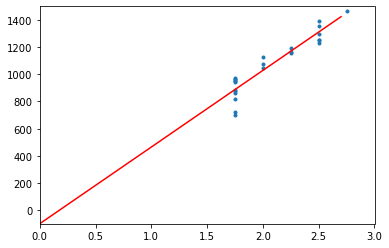

In [12]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

## Linear regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

The example of calculating linear regression using the `fit` and `predict` method can be found below.

### Data representation

Since a matrix can be represented as 2D array, in Python a matrix is represented as `list[list[type]]` for the purpose of the is e-tivity. I've opted to use float as the type.

Hence matrix will be represented as `list[list[float]]`

### Matrix validation functions

In [316]:
def is_matrix_valid(mtx: list[list[float]]) -> bool:
    """
    Parameters
    ----------
    mtx : list[list[float]]
        A matrix of dimension m*n.
            
    Returns
    -------
    bool
        Returns True if a matrix has all rows of the same length.
    """ 
    cls_count = len(mtx[0])
    return all( len(row) == cls_count for row in mtx )

In [317]:
def is_matrix_square(mtx: list[list[float]]) -> bool:
    """
    Parameters
    ----------
    mtx : list[list[float]]
        A matrix of dimension m*n.
            
    Returns
    -------
    bool
        Returns True if a matrix is square. Rows count are equal to column count.
    """ 
    return list({len(row) for row in mtx})[0] == len(mtx)

In [318]:
def get_matrix_shape(mtx: list[list[float]]) -> tuple:
    """
    Parameters
    ----------
    mtx : list[list[float]]
        A matrix of dimension m*n.
            
    Returns
    -------
    tuple
        Returns a tuple with column count and a list of row lenghts.
    """ 
    return (len(mtx), [len(row) for row in mtx])

In [319]:
def validate_matrix(mtx: list[list[float]], check_if_square: bool = False) -> None:
    """
    Validates the given matrix, if it's in correct shape and optionaly if its a square.
    
    Parameters
    ----------
    mtx : list[list[float]]
        A matrix of dimension m*n.
        
    check_if_square: bool, optional
        Optional to check if a given matrix is square: m*n = n*n.
            
    Returns
    -------
    None
    
    Raises
    ------
    ValueError
        If matrix is in invalid shape.
    """ 
    mtx_shape = get_matrix_shape(mtx)
    
    if not is_matrix_valid(mtx):
        raise ValueError(f"Matrix is in invalid shape.\nRow count: {matrix_shape[0]}\nColumn count: {matrix_shape[1]}")
        
    if check_if_square:
        if not is_matrix_square(mtx):
            raise ValueError(f"Matrix must be a square.\nRow count: {matrix_shape[0]}\nColumn count: {matrix_shape[1]}")

Test the above functions.

In [320]:
matrix_one = [[-1, 0, 3], [1, 1, 3]]
matrix_two = [[-1, 0], [1, 1]]

# Test 1: Test if validate_matrix raises ValueError if the given matrix is not a square.
try:
    validate_matrix(matrix_one, check_if_square = True)
except ValueError as e:
    print(f"Error: {e}")
    
# Test 2: Test if validate_matrix doesn't raise ValueError if the given matrix is a square.
try:
    validate_matrix(matrix_two, check_if_square = True)
except ValueError as e:
    print(f"Error: {e}")
    
# Test 3: Test validate_matrix return None if the matrix is valid.
matrix_valid = validate_matrix(matrix_one)
assert matrix_valid == None

# Test 4: Test if get_matrix_shape returns the correct values.
shape_of_matrix = (2, [3, 3])
mtx_shape = get_matrix_shape(matrix_one)
assert mtx_shape == shape_of_matrix

# Test 5: Test if is_matrix_square returns True if matrix is a square.
is_matrix_a_square = is_matrix_square(matrix_two)
assert is_matrix_a_square == True

# Test 6: Test if is_matrix_square returns False if matrix is not a square.
is_matrix_a_square = is_matrix_square(matrix_one)
assert is_matrix_a_square == False

Error: Matrix must be a square.
Row count: 2
Column count: [3, 3]


### Matrix opertaion functions

For the purpose of this e-tivity only the following three matrix opertaion functions are required:

* **Matrix multiplication**
* **Transposing a matrix**
* **Inversing a matrix**

**Note:** as outlined in the task section of the e-tivity only supporting the inverse of 2x2 matrix dimension is required. 

#### Matrix multiplication

$$
A = 
\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$

$$
B = 
\left(\begin{array}{cc} 
e & f\\
g & h
\end{array}\right)
$$ 
 
Then Matrix C = AB is denoted by

$$
C = 
\left(\begin{array}{cc} 
a(e) + b(g) & a(f) + b(h)\\
c(e) + d(g) & c(f) + d(h)
\end{array}\right)
$$  
 
An element in matrix C where C is the multiplication of Matrix A X B.

In [360]:
def matrix_multiplication(mtx_a: list[list[float]], mtx_b: list[list[float]]) -> list[list[float]]:
    """
    Multiplies the elements of matrix a and matrix b.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n
        
    mtx_b : list[list[float]]
        A matrix of dimension m*n
        
    Returns
    -------
    list[list[float]]
        Returns the resultant matrix of matrix multiplication.
        
    Raises
    ------
    ValueError
        If the the number of columns in matrix A is not equal to the number of rows in matrix B.
    """
    
    validate_matrix(mtx_a)
    
    validate_matrix(mtx_b)
    
    if len(mtx_a[0]) != len(mtx_b):
        raise ValueError("""
        The number of columns in matrix A must be the same
        as the number of rows in matrix B for matrix multiplication to be possible.
        """)
    
    return [[sum(mtx_a[i][k] * mtx_b[k][j] for k in range(len(mtx_b))) 
             for j in range(len(mtx_b[0]))] 
             for i in range(len(mtx_a))]

#### Matrix transponse

The transpose of a matrix is found by swapping the row and column indices of each element, effectively flipping the matrix over its diagonal.

If the rows and columns of a matrix A are interchanged (so that the first row becomes the first column, the second row becomes the second column, and so on) we obtain what is called the transpose of A.

$$
A = 
\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$ 

**The transpose of A is denoted by:**

$$
A^T =
\left(\begin{array}{cc} 
a & c\\ 
b & d
\end{array}\right)
$$

In [361]:
def transpose_matrix(mtx: list[list[float]]) -> list[list[float]]:
    """
    Transposes a matrix by switching its rows with its columns.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n
        
    Returns
    -------
    list[list[float]]
        Returns the transposed matrix.
        
    Raises
    ------
    ValueError
        If matrix is not in valid shape. Rows length differ.
    """
    validate_matrix(mtx)
    
    return [[mtx[b][a] for b in range(len(mtx))] for a in range(len(mtx[0]))]  

#### Matrix Inverse

The inverse of a square matrix A, sometimes called a reciprocal matrix, is a matrix $ A^{-1} $ such that $ A*A^{-1} = I $ where $ I $ is the identity matrix.

The determinant of A is a scalar value and is given by:

$$ |A| = ad - bc $$

A square matrix A has an inverse if the determinant $ |A|\neq0 $. Otherwise the matrix is not reversible.

The so-called invertible matrix theorem is major result in linear algebra which associates the existence of a matrix inverse with a number of other equivalent properties. A matrix possessing an inverse is called nonsingular, or invertible.

**For a 2x2 matrix**

$$
A = 
\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$ 

the matrix inverse is

$$
A^{-1} = \frac{1}{|A|} 
\left(\begin{array}{cc} 
d & -b\\
-c & a
\end{array}\right)
$$ 

In [369]:
def inverse_matrix(mtx: list[list[float]]) -> list[list[float]]:
    """
    Inverses a matrix by dividing each element of the matrix by the determinant of the matrix. Switiching a and d, negating c and b.
    If the the determinant is 0 then a inverse doesn't exist.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n.
        
    Returns
    -------
    list[list[float]]
        Returns the inversed matrix.
        
    Raises
    ------
    ValueError
        If matrix is not in valid shape or if its determinant is equal to 0.
    """
    matrix_shape = get_matrix_shape(mtx)
        
    validate_matrix(mtx, check_if_square=True)

    if not len(mtx) == 2 and len(mtx[0]) == 2:
        raise ValueError("Matrix must be of size 2x2.\nRow count: {matrix_shape[0]}\nColumn count: {matrix_shape[1]}")
        
    a, b, c, d = mtx[0][0], mtx[0][1], mtx[1][0], mtx[1][1]
    # Calculate the determinant of the matrix det = ad - bc.
    dt = (a * d) - (b * c)
    
    if not dt:
        raise ValueError("Matrix is not reversible. Its determinant is zero. ad - bc = 0")
    
    # Divide each element of the original matrix by the determinant to obtain the elements of the inverse matrix.
    return [[d / dt, -b / dt], [-c / dt, a / dt]]

#### Test the above functions:

* `inverse_matrix`
* `transpose_matrix`
* `matrix_multiplication`

In [375]:
matrix_one = [[-1, 0], [1, 1]]
matrix_two = [[1.0, 2.0], [3.0, 4.0]]
matrix_three = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0,8.0,9.0], [10.0,11.0,12.0]]

# Test 1: Test if matrix_multiplication multiplies matrices correctly.
mtx = matrix_multiplication(matrix_one, matrix_two)
assert mtx == [[-1.0, -2.0], [4.0, 6.0]]

# Test 2: Test if matrix_multiplication raises ValueError if the row count of matrix A not equal column count of matrix B.
try:
    mtx = matrix_multiplication(matrix_one,matrix_three)
except ValueError as e:
    print(f"Error: {e}")
    
# Test 3: Test if transpose_matrix computes the transpose of a matrix correctly.
inverse_of_x = inverse_matrix(matrix_one)
assert inverse_of_x == [[-1.0, -0.0], [1.0, 1.0]]

# Test 4: Test if multiplying the transpose of the matrix by its self results in the identity matrix.
identity_matirx = matrix_multiplication(matrix_one, inverse_of_x)
assert identity_matirx == [[1.0, 0.0], [0.0, 1.0]]

Error: 
        The number of columns in matrix A must be the same
        as the number of rows in matrix B for matrix multiplication to be possible.
        


#### Dot product

The dot product, also called scalar product, is a measure of how closely two vectors align, in terms of the directions they point. The measure is a scalar number that can be used to compare the two vectors and to understand the impact of repositioning one or both of them. The dot product  of two vectors is the sum of the products of corresponding components.

$$
v1 = 
\left(\begin{array}{cc} 
4 & 6 & 6\\
\end{array}\right) 
$$ 
$$
v2 = 
\left(\begin{array}{cc} 
6 & 5 & 6\\
\end{array}\right) 
$$ 
$$
v1 * v2 = \left(\begin{array}{cc} 
4*6 & 6 * 5 & 6 * 6\\
\end{array}\right) 
= 96
$$ 

In [395]:
 def dot_product(vct_a: list[float], vct_b: list[float]) -> float:
    """
    Calculates the dot product (scalar product) of the two given vectors.
    
    Parameters
    ----------
    vct_a : list[float]
        A vector of length m.
        
    vct_b : list[float]
        A vector of length m.
        
    Returns
    -------
    float
        Returns the dot product (scalar product) of the two given vectors.
        
    Raises
    ------
    ValueError
        If the vectors are not of the same length.
    """
    if len(vct_a) != len(vct_b):
        raise ValueError("Vector A and vector B must be of the same length.")
        
    return sum([i*j for (i, j) in zip(vct_a, vct_b)])

In [396]:
v1 = [4, 6, 7]
v2 = [6, 5, 6]

# Test 1: Test that dot_product multiplies two given vectors correctly.
r1 = dot_product(v1, v2)
assert r1 == 96

# Test 2: Test that dot_product raises ValueError if two given vectors are of different sizes.
v1 = [1, 2]
v2 = [4, 5, 6]
try:
    dot_product(v1, v2)
except ValueError as e:
    print(f"ERROR: {e}")

ERROR: Vector A and vector B must be of the same length.


In [ ]:
def is_val_a_matrix(val) -> bool:
    """
    Checks if val is a valid matirx
    
    Parameters
    ----------
    val
        Value passed to be checked if its a matrix - a list of lists.
        
    Returns
    -------
    bool
        Returns True if value passed if a list of lists.
    """
    if not val or not isinstance(val, list):
        return False
    
    return all(isinstance(sublist, list) and len(sublist) == len(val[0]) for sublist in val)

In [ ]:
def list_to_matrix(lst: list[float]) -> list[list[float]]:
    """
    Converts a list to a list of list - matrix.
    
    Parameters
    ----------
    lst : list[float]
        List of values to be converted to a matrix.
        
    Returns
    -------
    list[list[float]]
        Returns a list to be converted to a matrix.
    """
    return [[x] for x in lst]

### Finding the weights example:

Given X and y, calculate the weights, w using the pseudo-inverse approach described above. 

$$
X = 
\left(\begin{array}{cc} 
1 & 1\\
1 & 2\\
1 & 3
\end{array}\right)
$$

$$
y = \left(\begin{array}{cc} 
3\\
7\\
11
\end{array}\right)
$$ 


**First step is to find the Transpose of X:**

$$
X^T = 
\left(\begin{array}{cc} 
1 & 1 & 1\\
1 & 2 & 3
\end{array}\right)
$$ 

**Once the transpose of X has been found. We multiply X by its transpose, $ X^T $:**

$$
X^TX = 
\left(\begin{array}{cc} 
1 & 1 & 1\\
1 & 2 & 3
\end{array}\right)
\left(\begin{array}{cc} 
1 & 1\\
1 & 2\\
1 & 3
\end{array}\right)
= \left(\begin{array}{cc} 
3 & 6\\
6 & 14
\end{array}\right)
$$ 

**Then calculate the inverse, $ X^TX^{−1}:$**

$$
X^TX^{−1} = \frac{1}{3.14 - 6.6}\left(\begin{array}{cc} 
14 & - 6\\
- 6 & 3
\end{array}\right)
$$ 

**Once the inverse has been found of $ X^TX^{−1} $ find the dot product of, $ X^Ty$:**

$$
X^TXy = \left(\begin{array}{cc} 
1 & 1 & 1\\
1 & 2 & 3
\end{array}\right)
\left(\begin{array}{cc} 
3\\
7\\
11
\end{array}\right)
= \left(\begin{array}{cc} 
21\\
50
\end{array}\right)
$$ 

**Lastly we find the weight, $w$ by finding the dot product of $ (X^TX^{−1})X^Ty$:**

$$
w = (X^TX^{−1})X^Ty = \left(\begin{array}{cc} 
14 & - 6\\
- 6 & 3
\end{array}\right)\left(\begin{array}{cc} 
21\\
50
\end{array}\right)
=\left(\begin{array}{cc} 
-1\\
4
\end{array}\right)
$$ 

**These found weights $w_0 = -1$ and $ w_1 = 4$** can be used for predictions of new data points on a straight line using the below equation of the straight line: $$ y = wx = w_0 + w_1x_1$$

In [397]:
 def get_params(x: list[list[float]], y: list[float]) -> list[float]:
    """
    Weights calculated by the fit method.
    
    Parameters
    x : list[list[float]]
        A two 2d array of data points.
        
    y : list[float]
        A list of weights found by the fit method.
        
    Returns
    -------
    list[float]
        Returns a list of weights calculated by the fit method.
    """
    return fit(x, y)

In [398]:
 def predict(x: list[list[float]], weights: list[float]) -> list[float]:
    """"
    Yields a list of predictions based on the data points in X.
    
    Parameters
    ----------
    x : list[list[float]]
        A two 2d array of data points.
        
    weights : list[float]
        A list of weights found by the fit method.
        
    Returns
    -------
    list[float]
        Returns a list of the dot products (predictions) of rows in X multiplied by the weigh vector.
        
    Raises
    ------
    ValueError
        If the vectors are not of the same length.
    """
    return [dot_product(row, weights) for row in x]

In [401]:
def fit(x: list[list[float]], y: list[float]) -> list[float]:
    """"
    Calculates least squares estimate of the linear regression weight vector using x and y.
    
    Parameters
    ----------
    x : list[list[float]]
        A two 2d array of data points.
        
    y : list[float]
        A list of weights found by the fit method.
        
    Returns
    -------
    list[float]
        Returns a list of weights.
        
    Raises
    ------
    ValueError
        If the number of rows in x is not equal to the number of elements in y.
    """
    if len(x) != len(y):
        raise ValueError(f"Number of rows in x must be the same as the number of elements in y. No of rows in x: {len(x)}\nSize of y: {len(y)}\n")
        
    # Calculate the transpose of x
    transpose_of_x = transpose_matrix(x)
    
    # Calulcate the transpose of x by x
    xtx = matrix_multiplication(transpose_of_x, x)

    # Inverse the result of x^T * x
    xtx_inv = inverse_matrix(xtx)

    # Compute the matrix using the transpose of x and list of y converted to matrix
    # Checks if y is a matrix an converts if not
    xty = matrix_multiplication(transpose_of_x, list_to_matrix(y) if not is_val_a_marix(y) else y)

    # Calculate the least squares estimate of the linear regression weight vector
    weights = matrix_multiplication(xtx_inv, xty)

    return [row[0] for row in weights]

In [402]:
x = [[1, 1], [1, 2], [1, 3]]  
y = [3, 7, 11] 

# Caluclate and return the weights found by the fit method
weights = get_params(x,y)

# Predict with the obtained weights
predictions = predict(x, weights)

print("Weights:", weights)
print("Predictions:", predictions)

Weights: [-1.0, 4.0]
Predictions: [3.0, 7.0, 11.0]


<hr style="border:2px solid gray"> </hr>

### Read CSV file

This function reads the csv file using csv lib. However instead of using the csv lib, I could have also read the csv line by line and have it split on comma.

In [403]:
 def open_file(file_name:str) -> (list[list[float], list[float]]):
    """"
    Opens and reds csv file of data points.
    
    Parameters
    ----------
    file_name: str
        Name of the CSV file to be read.
        
    Returns
    -------
    tuple(list[list[float], list[float]])
        Returns a tuple of x data points and y values.
    """
    x = []
    y = []

    try:
        with open(file_name, 'r', newline='') as file:
            reader = csv.reader(file)
            for row in reader:
                values = [float(value) for value in row]
                x.append(values[:-1])
                y.append(values[-1])
    except FileNotFoundError:
        print(f"{file_name} not found.")
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

    return (x, y)

In [405]:
# Open lr_data.csv and read the data points x
x, y = open_file("lr_data.csv")

# Caluclate and return the weights found by the fit method
weights = get_params(x, y)

# Predict with the obtained weights
predictions = predict(x, weights)

print("Weights:", params)
print("Predictions:", predictions)

Weights: [-99.46431881371245, 564.2038924930494]
Predictions: [1452.0963855421733, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1169.9944392956486, 1169.9944392956486, 1169.9944392956486, 1028.9434661723863, 1028.9434661723863, 1028.9434661723863, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239]


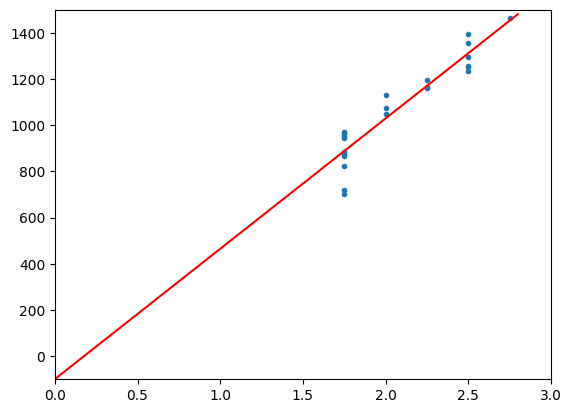

In [410]:
indices = [i for i in range(29)]
indices = [i/10.0 for i in indices]

x_values = [x[1] for x in x]

# Plotting
plt.plot(x_values, y, '.')
plt.plot(indices, [i * weights[1] + weights[0] for i in indices], 'r')
plt.axis([0, 3, -100, 1500])
plt.show()

## Reflection